# 1. S-E-I-R Model

SEIR model is a common simulation model in computer simulation of epidemics. This SEIR models people in four states, which are susceptible, exposed, infected, and resistant. People will have their own state at each unit time and each state also represents the amount of people in this state.<br><br>

In the study of COVID-19 using SEIR model and Markov Chain, there are assumptions. The first one is that people who recoverd will be immutable. The second assumption is death and birth rate are not considered in this model.<br><br>

S - the total amount of susceptible people<br>
E - the total amount of exposed people<br>
I - the total amount of infected people<br>
R - the total amount of recovered people<br><br>

The mathmatical expression of SEIR model is described below.<br>
\begin{align*}
&\frac{dS}{dt} = -\frac{\beta SI}{N}\\
&\frac{dE}{dt} = \frac{\beta SI}{N} - \alpha E\\
&\frac{dI}{dt} = \alpha E - \lambda I\\
&\frac{dR}{dt} = \lambda I\\
&N = S + E + I + R
\end{align*}<br><br>

SEIR represents people's different states. S represents people who are able to contract with the disease. E represents people who are infected but not yet infectious. I represents people who are infected and infectious. R represents people who are recovered. N represents the total amount of people. $\beta$ represents the probability that a suscepptible person is infected by a infected person. $\alpha$ represents the probability that a exposed person becomes infectious. $\lambda$ represents the probability that a infected person recovered.



P_j = \sum_{i=0}{j = n} P_i * Pij

# 2. Markov Chain Model

In order to implement and analyse the SEIR model, Markov Chain method is implemented. In this section, COVID-19 progression is assumed to follow a discrete time Markov chain with stationary transition probabilities, which is represented as: ${X(t), t ∈ T}$ with time index set $T ={0,1,…}$ and a finite state space $S ={S_1,S_1,…,S_N}$. The Markov Chain model satisfies the rules that the probability of the random variable X being in the state $S_i$ at time t depends on the X's state at time t-1.<br><br>

In the study of COVID-19, $\sum$ is used to represents the space of all states. A 1-D system is built to represent the state in the Markov Chain Model. Each element in the array, which is of length n, represents a person and the value of the element represents the state of that person.<br><br>

In the Markov Chain System, there are $n$ people in the system and they are distributed in a one dimensional array. $\sum$ is the state space and $\sigma \in \sum$ represents a state. $\sigma = (g_1,g_2,...,g_nm)$ and $g_i \in(S,E,I,R)$. $S$ means that the person is susceptible. $E$ represents the person has been exposed but not tested. $I$ means that the person has been infected and tested positive. $R$ means that the person has recovered. In the system, an $n$ array are used to represent people. Each person in the matrix will has their own state, which could be susceptible, exposed, infected or recovered. Then the matrix that contains everyone's state is called a state of Markov Chain.<br><br>

A sample state is given below. Assume there are 5 people and an array with length 5 is built.<br><br>

\begin{align*}
\sigma = \begin{bmatrix}
    0&1&2&1&3
\end{bmatrix}
\end{align*}

$S=0, E = 1, I = 2, R = 3$.<br><br>

# 2.1 Assumptions

1. An infected person only infects his adjacent neighbours.<br><br>
2. People who recovered from the disease will be immutable.

# 2.2 State

For a 1-D system, there are $n$ people and each person will have 4 posible states. Therefore, the states of Markov Chain model will be $4^n$.<br><br>


In [2]:
import numpy as np
import scipy as sp
import scipy.sparse
import itertools
import matplotlib.pyplot as plt
import random

In [3]:
# define parameters
S = 0
E = 1
I = 2
R = 3
n = 4

#get possible values of a cell
values = list (range(S,R+1));
print(len(values))
# Generate Sigma
sigma = set (itertools.product(values, repeat=n));

#print the basic information of this example
print ("There are ", n, " people in this case. They are distributed in a ",n," elements array.\n")
print ("There are ",len(sigma)," states.\n")

4
There are  4  people in this case. They are distributed in a  4  elements array.

There are  256  states.



In [4]:
#transfer a matrix to a string
def convert_state_to_string (state):
    str1 = ""   
    for ele in state:
        ele = int(ele)
        str1 += str(ele)  
    return str1  
    
#transfer a string to a matrix
def convert_string_to_state (str):
    return [int(x) for x in str if x.isdigit()]

#generate all the states and save them into a hash map
map = {}
index2str = {}
str2index = {}
i = 0
for state in sigma:
    map[convert_state_to_string(state)] = state
    index2str[i] = convert_state_to_string(state)
    str2index[convert_state_to_string(state)] = i
    i += 1
    

# 2.3 Transition Matrix

The key of Markov Chain Model is the transition matrix and transition matrix is a square matrix. Each column/row is a state. In another word, the matrix will have $4^n$ rows and $4^n$ columns if there are n person in this system. Each element in the transition matrix represents the probability that a state goes to another state.<br><br>

The limit of markov chain model is that the problem can not be scaled. In order to compute the transition matrix, the time complexity is $O(4^n)$, which is very expensive. Therefore, it can only be applied to small scale problem.<br><br>

Let use A to denote the transition matrix.<br><br>
\begin{align*}
A = \begin{bmatrix}
    \sigma_{1,1}&\sigma_{1,2}& ... &\sigma_{1,4^n}\\
    \sigma_{2,1}&\sigma_{2,2}& ... &\sigma_{2,4^n}\\
    \vdots&\vdots& \ddots &\vdots\\
    \sigma_{4^n,1}&\sigma_{4^n,2}& ... &\sigma_{4^n,4^n}\\
\end{bmatrix}
\end{align*}

Based on the analysis of real world data, the parameters of the model are predefined. These parameters will be modified inthe future.

In [71]:
P_E2R = 0.80
P_E2I = 1 - P_E2R
P_I2R = 0.96
P_SByE = 0.8
P_SByI = 0.9
Trans_Matrix = np.zeros(shape=(len(sigma),len(sigma)))

def checkE (i, src):
    count = 0
    if i != 0:
        if (src[i-1] == E):
            count += 1
    if i != n-1:
        if (src[i+1] == E):
            count += 1 
    return count

def checkI (i, src):
    count = 0
    if i != 0:
        if (src[i-1] == I):
            count += 1
    if i != n-1:
        if (src[i+1] == I):
            count += 1
    return count


def get_prob(src, dest, i, prob):
    s = src[i]
    d = dest[i]
    ##check edge case
    if s == R and d != R:
        prob = 0
        return prob
    elif s == I and d < I:
        prob = 0
        return prob
    elif s == E and d < E:
        prob = 0
        return prob
    elif s == S and d == R:
        prob = 0
        return prob
    elif s == S and d == I:
        prob = 0
        return prob

    ##check neighbor
    countE = checkE(i,src)
    countI = checkI(i,src)
    if s == R:
        prob = prob * 1
    elif s == I and d == I:
        prob = prob * (1 - P_I2R)
    elif s == I and d == R:
        prob = prob * P_I2R
    elif s == E and d == E:
        prob = prob * (1 - P_E2R - P_E2I)
    elif s == E and d == I:
        prob = prob * P_E2I
    elif s == E and d == R:
        prob = prob * P_E2R
    elif s == S and d == E:
        prob = prob * (1-(1-P_SByE)**countE * (1-P_SByI)**countI)
    elif s == S and d == S:
        prob = prob * (1-P_SByE)**countE * (1-P_SByI)**countI
        
    return prob

#Given conditional probabilities, a transition matrix will be computed.
for sc in range(len(sigma)):
    for dc in range(len(sigma)):
        src = map[index2str[sc]]
        dest = map[index2str[dc]]
        prob = 1
        for i in range(len(src)):
            prob = get_prob(src, dest, i, prob)
        Trans_Matrix[sc,dc] = prob

# 2.4 Markov Chain Simulation


Based on the transition matrix, the Markov Chain Simulation can be implemented. <br><br>

Initial State: One infected person will be chosen among the n people and will be randomly assign to a position.
Steady State: After running many times, the simulation will reach a steady state. <br><br>
    
The probability matrix at steady state means the probability of the markov chain state. 
Let use v denote the initial state, which is a $4^n$ vector. A is the transition matrix. S is probability vector at steady state.<br><br>

\begin{align*}
S = vA^n
\end{align*}

In [72]:
#generate initial state
poll = [0] * n
for i in range(len(poll)):
    poll[i] = i
initial_infected = random.choice(poll)
temp = [0] * n
temp[initial_infected] = 2
initial_state_index = str2index[convert_state_to_string(temp)]
v = np.zeros(shape=(len(sigma),1))
v[initial_state_index] = 1
res = v.transpose()
#res = v*Trans_Matrix
def countInfected(list):
    countInf = 0
    for i in range(len(list)):
        if(list[i] == 1 or list[i] == 2):
            countInf += 1 
    return countInf
        
    
def unittest_StateBase(days, Trans_Matrix, temp, res):
    print("Initial State: ",map[convert_state_to_string(temp)])
    
    tempres = res
    dcount = 0
    prob_numInf = {}
    X_days = [i for i in range(days)]
    for i in range(n):
        tempArray = [0 for i in range(days)]
        prob_numInf[i] = tempArray
    
    
    while dcount < days:
        tempres = np.matmul(tempres,Trans_Matrix)

        proOfnumInfected = [0 for i in range(n)]
        for i in range(len(tempres[0])):  
            index = countInfected(map[index2str[i]]) - 1
            proOfnumInfected[index] += tempres[0,i]
            
        for i in range(n):
            tempArray = prob_numInf[i]
            tempArray[dcount] = proOfnumInfected[i]
        dcount += 1
    
    
    for i in range(n):
        plt.plot(X_days, prob_numInf[i])
    labels = ["Number of Infected people is: "+str(i) for i in range(n)]
    plt.legend(labels)
    
    maxState = map[index2str[0]]
    maxProb = tempres[0,0]
    if (tempres[0,i] > maxProb):
        maxState = map[index2str[i]]
        maxProb = tempres[0,i]   
    
    print(" The most likly state is : ",maxState, " and the probability: ", maxProb);        
        
        
    


In [77]:
def countInfected_AllIncluded(list):
    countInf = 0
    for i in range(len(list)):
        if(list[i] > 0):
            countInf += 1 
    return countInf
        
    
def unittest_AllInfected(days, Trans_Matrix, temp, res):
    print("Initial State: ",map[convert_state_to_string(temp)])
    
    tempres = res
    dcount = 0
    prob_numInf = {}
    X_days = [1+i for i in range(days)]
    for i in range(n):
        tempArray = [0 for i in range(days)]
        prob_numInf[i] = tempArray
    
    
    while dcount < days:
        tempres = np.matmul(tempres,Trans_Matrix)

        proOfnumInfected = [0 for i in range(n)]
        for i in range(len(tempres[0])):  
            index = countInfected_AllIncluded(map[index2str[i]]) - 1
            proOfnumInfected[index] += tempres[0,i]
            
        for i in range(n):
            tempArray = prob_numInf[i]
            tempArray[dcount] = proOfnumInfected[i]
        dcount += 1
    
    
    for i in range(n):
        plt.plot(X_days, prob_numInf[i])
    labels = ["Number of Infected people is: "+str(i) for i in range(n)]
    plt.legend(labels)
    
    maxState = map[index2str[0]]
    maxProb = tempres[0,0]
    if (tempres[0,i] > maxProb):
        maxState = map[index2str[i]]
        maxProb = tempres[0,i]   
    
    print(" The most likly state is : ",maxState, " and the probability: ", maxProb); 

# 2.5 Analysis

The transition matrix is plot below.

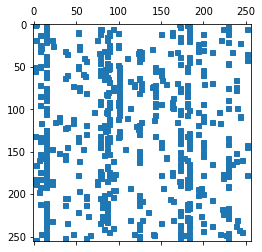

In [81]:
plt.spy (Trans_Matrix, markersize=5, precision=.1)

The  steady state is calculated.

Initial State:  (0, 0, 2, 0)
 The most likly state is :  (0, 2, 0, 1)  and the probability:  0.0


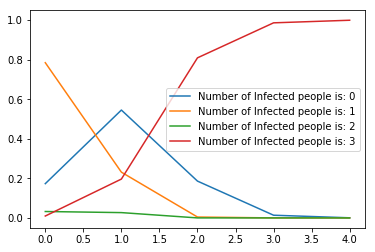

In [84]:
unittest_StateBase(5,Trans_Matrix,temp,res)

Initial State:  (0, 0, 2, 0)
 The most likly state is :  (0, 2, 0, 1)  and the probability:  0.0


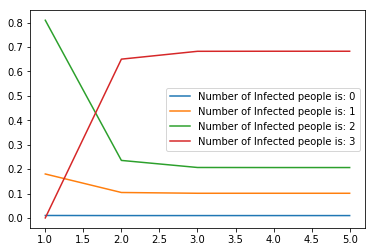

In [85]:
unittest_AllInfected(5,Trans_Matrix,temp,res)